# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [146]:
df = pd.read_csv("loan_prediction.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA:

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('____________')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
____________
Male      489
Female    112
Name: Gender, dtype: int64
____________
Yes    398
No     213
Name: Married, dtype: int64
____________
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
____________
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
____________
No     500
Yes     82
Name: Self_Employed, dtype: int64
____________
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
____________
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
____________
120.0    20
110.0    17
100.0    15

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

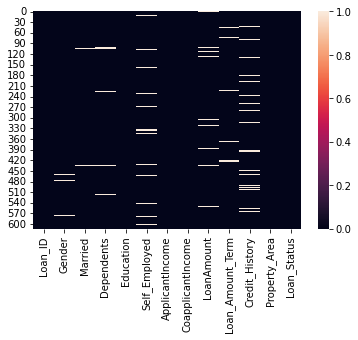

In [11]:
import seaborn as sns
sns.heatmap(df.isnull())

We observe that the missing values are present in the columns [Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History]

# Filling missing values:

In [147]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df['Gender']=emb.fit_transform(df['Gender'].values.reshape(-1, 1))
df['Married']=emb.fit_transform(df['Married'].values.reshape(-1, 1))
df['Dependents']=emb.fit_transform(df['Dependents'].values.reshape(-1, 1))
df['Self_Employed']=emb.fit_transform(df['Self_Employed'].values.reshape(-1, 1))
df['Loan_Amount_Term']=emb.fit_transform(df['Loan_Amount_Term'].values.reshape(-1, 1))
df['Credit_History']=emb.fit_transform(df['Credit_History'].values.reshape(-1, 1))

In [148]:
df['LoanAmount']=emb.fit_transform(df['LoanAmount'].values.reshape(-1, 1))

In [149]:
#let's remove load_id because it is not useful for our model.
df.drop(['Loan_ID'],axis=1,inplace=True)

In [126]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

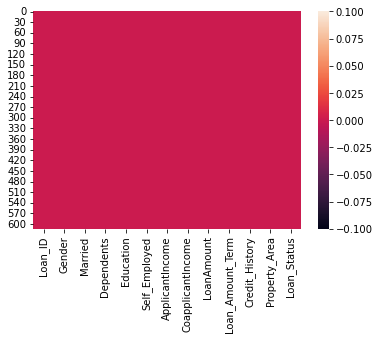

In [29]:
sns.heatmap(df.isnull())

All null values are cleared.

In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


By describing the dataset,we observe that Max and 75% has much difference.

In [37]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Visualisation:

Male      502
Female    112
Name: Gender, dtype: int64


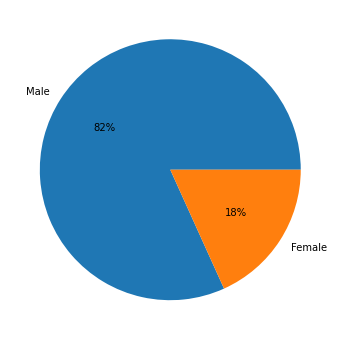

In [50]:
fig,x=plt.subplots(figsize=(8,6))
labels='Male','Female'
x.pie(df['Gender'].value_counts(),autopct='%1.0f%%',labels=labels)
print(df["Gender"].value_counts())
plt.show()

We see that the Major Loan Applicants are Male i.e 82%

<AxesSubplot:xlabel='Married', ylabel='count'>

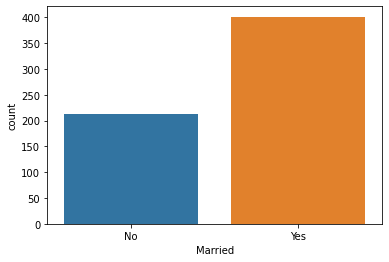

In [44]:
sns.countplot(df['Married'])

Married members are the major loan applicants.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

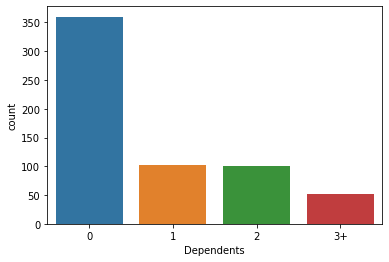

In [45]:
sns.countplot(df['Dependents'])

We observe more count for 0 dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


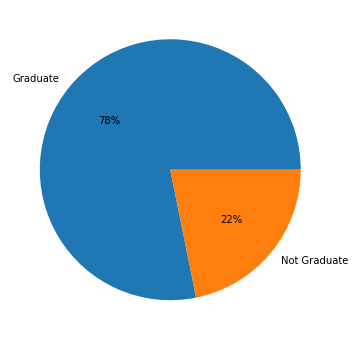

In [51]:
fig,x=plt.subplots(figsize=(8,6))
labels='Graduate','Not Graduate'
x.pie(df['Education'].value_counts(),autopct='%1.0f%%',labels=labels)
print(df["Education"].value_counts())
plt.show()

78% of applicants are Graduates.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

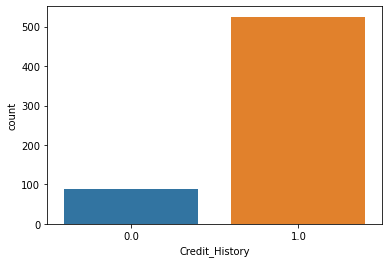

In [52]:
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

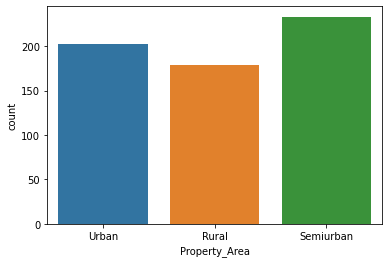

In [54]:
sns.countplot(df['Property_Area'])

In [138]:
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


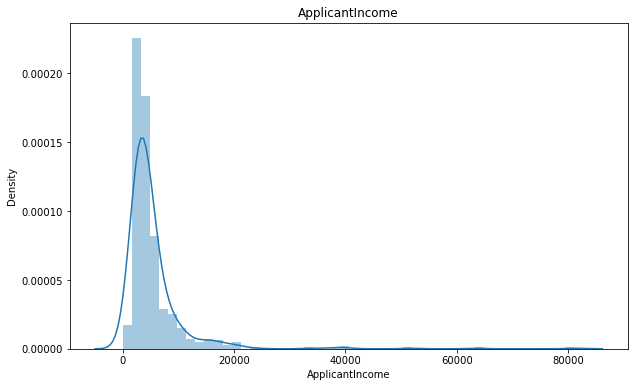

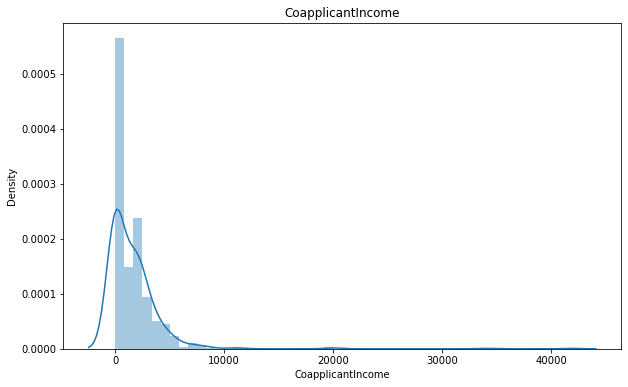

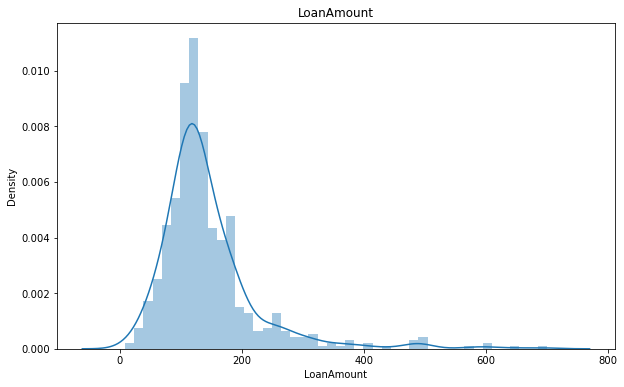

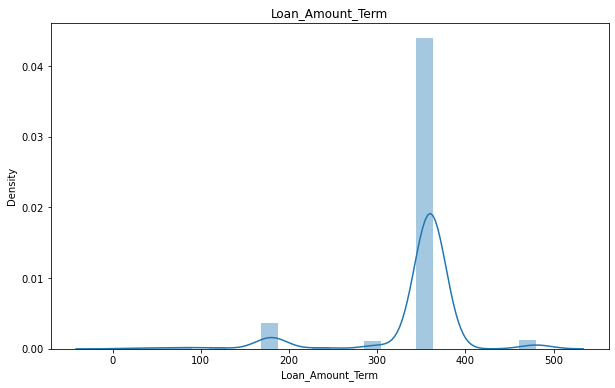

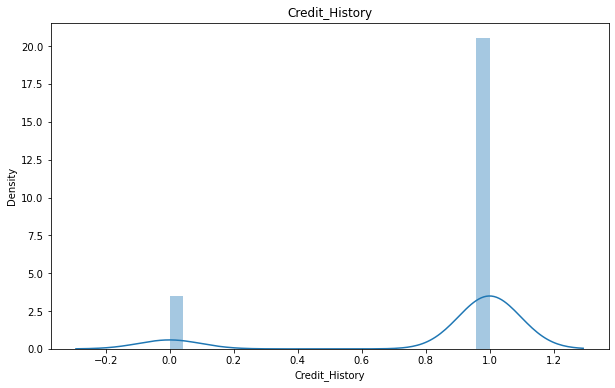

In [56]:
for i in df[num_cols]:              
    plt.figure(figsize = (10,6))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

Bivariate Analysis:

<AxesSubplot:xlabel='Gender', ylabel='count'>

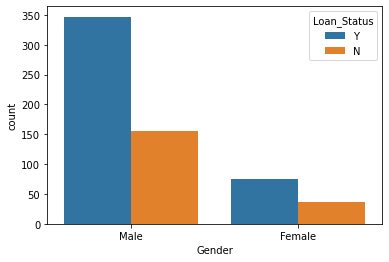

In [64]:
sns.countplot(df["Gender"],hue=df["Loan_Status"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

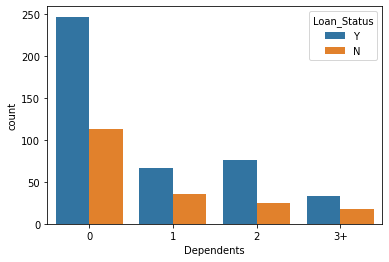

In [70]:
sns.countplot(df["Dependents"],hue=df["Loan_Status"])

<AxesSubplot:xlabel='Education', ylabel='count'>

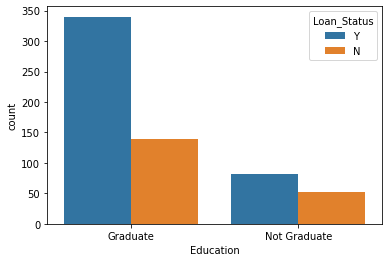

In [68]:
sns.countplot(df["Education"],hue=df["Loan_Status"])

<AxesSubplot:title={'center':'Comparision between Property_Area and LoanAmount'}, xlabel='Property_Area', ylabel='LoanAmount'>

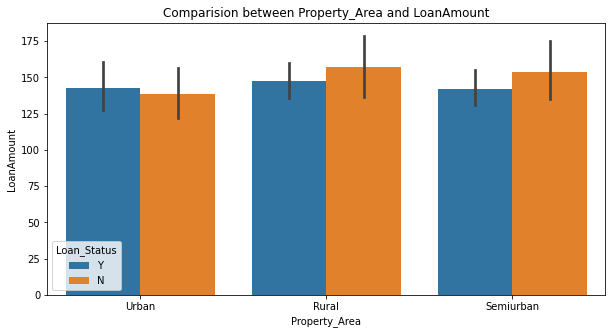

In [87]:
plt.figure(figsize=[10,5])
plt.title('Comparision between Property_Area and LoanAmount')
sns.barplot(df['Property_Area'],df['LoanAmount'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Comparision between ApplicantIncome and LoanAmount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

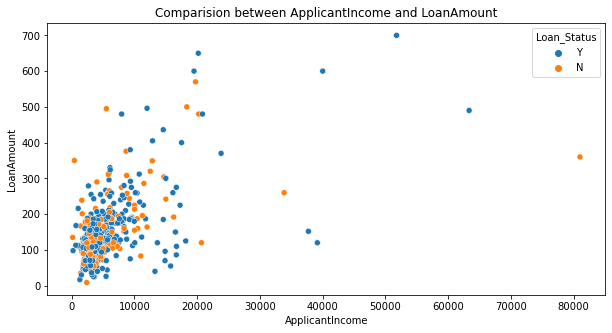

In [88]:
plt.figure(figsize=[10,5])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

# Multivariate Analysis:

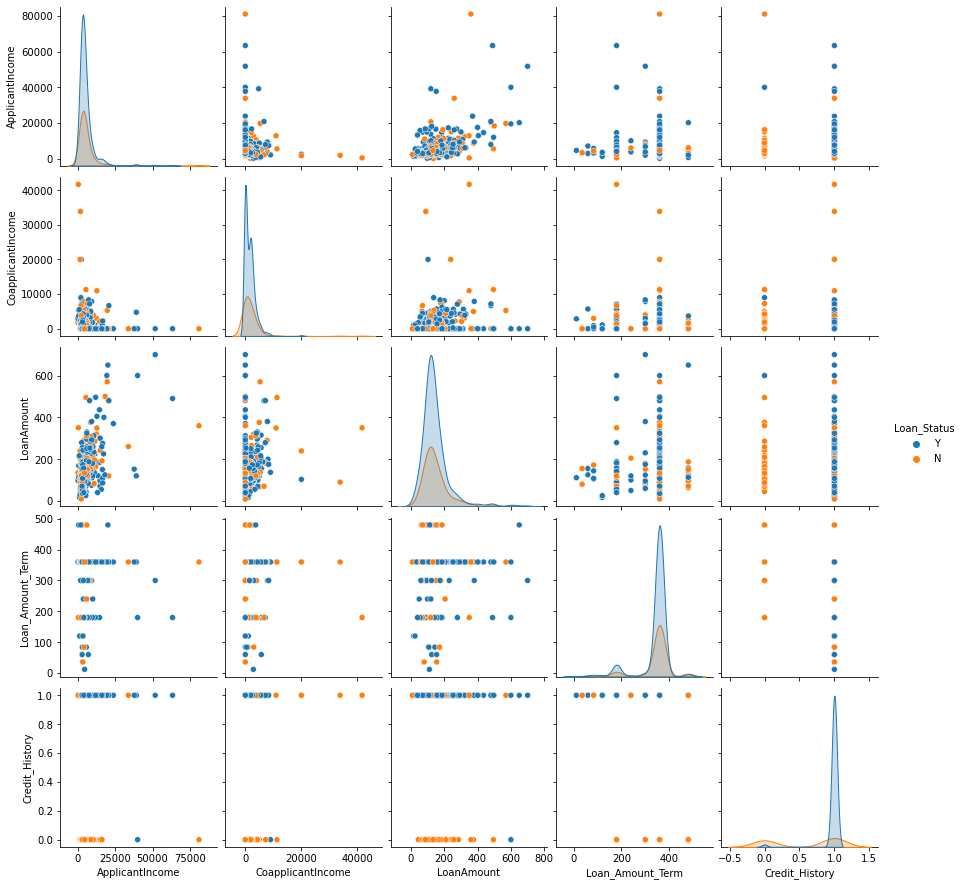

In [89]:
sns.pairplot(df,hue="Loan_Status")

# Outliers:

<AxesSubplot:>

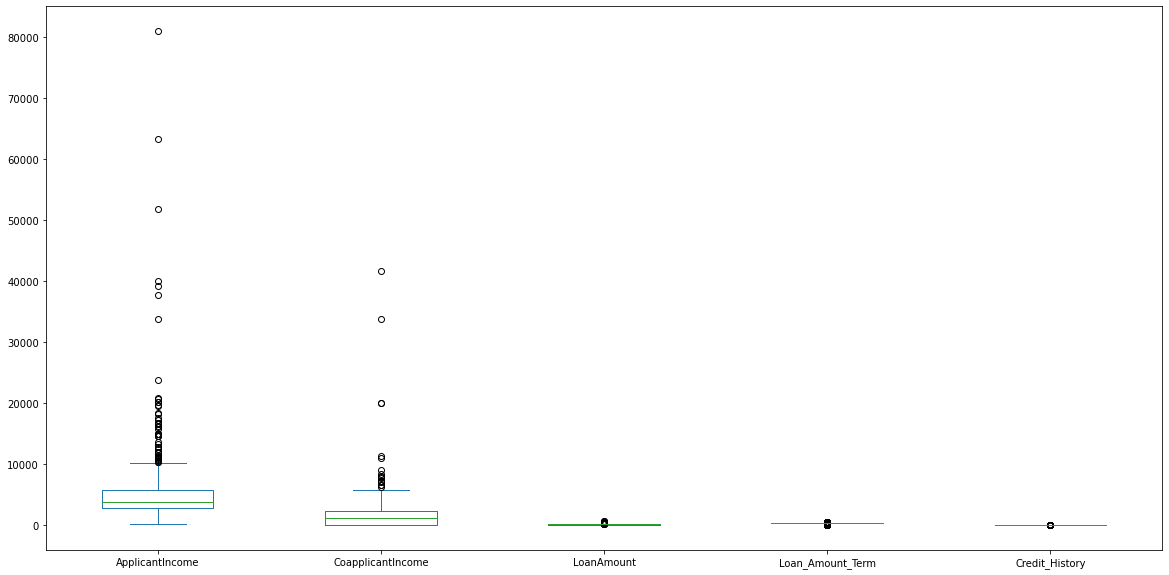

In [151]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [152]:
cols = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

In [153]:
from scipy.stats import zscore
z=np.abs(zscore(cols))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [154]:
df.shape

(614, 12)

In [155]:
df_new.shape

(577, 12)

# Percentage of Loss:

In [156]:
Loss = (614-577)/614*100
Loss

6.026058631921824

By Z-score technique there is only 6% of Data loss which is allowable.

# Skewness:

In [157]:
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

we observe the skewness,so let's solve it. 

In [158]:
sk=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [160]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [161]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

In [162]:
df_new.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

# Encoding:

In [163]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [164]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_new[cat_cols]=df[cat_cols].apply(enc.fit_transform)

In [166]:
df_new[cat_cols].head(5)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


# Correlation:

In [167]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.171487,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181581,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131571,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.129539,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.116899,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.430640,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.201567,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.171487,0.181581,0.131571,-0.129539,0.116899,0.430640,0.201567,1.000000,0.050277,-0.003309,-0.099771,-0.021065
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.050277,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003309,0.027392,1.000000,-0.008121,0.560936


<AxesSubplot:>

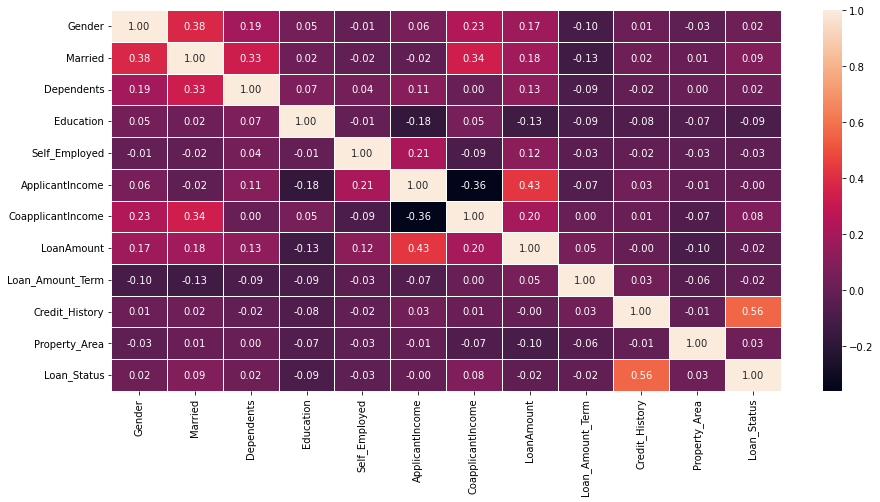

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

->Credit History has Higher Correlation.

->Applicant Income is Least correlated with the Target Variable.

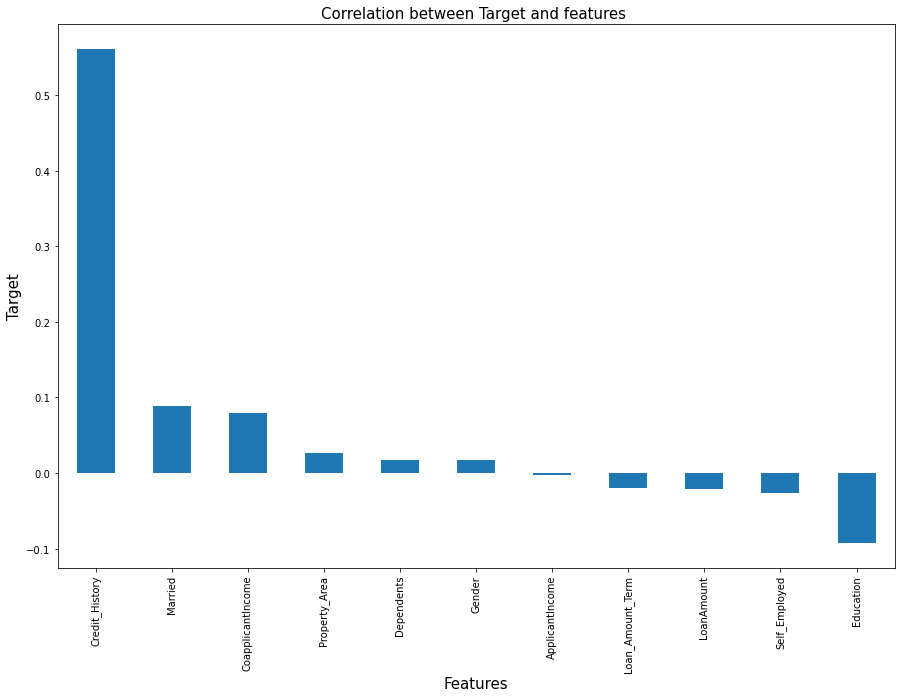

In [170]:
plt.figure(figsize=(15,10))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

# Seperating the columns into features and target as X and Y:

In [171]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

# Scaling:

In [172]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,-0.145633,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.008621,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.432788,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.145633,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.245833,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.288499,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.335137,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845431,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.981439,0.230853,0.418513,1.227472


In [174]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

We observe the data imbalance,So Let's solve by using SMOTE.

# Balancing the 'Y' variable:

In [175]:
from imblearn.over_sampling import SMOTE
st=SMOTE()
x,y=st.fit_resample(x,y)

In [176]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now the Data is Balanced.

# Finding Best Random State:

In [185]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [178]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.875  on Random_state  78


In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

# Decision Tree Classifier:

In [181]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.875
Confusion Matrix is  
 [[64 10]
 [10 76]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.88      0.88      0.88        86

    accuracy                           0.88       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.88      0.88      0.88       160



# Random Forest Classifier:

In [182]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.8875
Confusion_Matrix is  [[66  8]
 [10 76]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        74
           1       0.90      0.88      0.89        86

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



# KNeighbors Classifier:

In [183]:
kn=KNC()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.74375
[[61 13]
 [28 58]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        74
           1       0.82      0.67      0.74        86

    accuracy                           0.74       160
   macro avg       0.75      0.75      0.74       160
weighted avg       0.76      0.74      0.74       160



# Support Vector Classifier:

In [194]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.78125
Confusion_Matrix is  [[51 23]
 [12 74]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.81      0.69      0.74        74
           1       0.76      0.86      0.81        86

    accuracy                           0.78       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.78      0.78      0.78       160



# Adaboost Classifier:

In [186]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred=ABC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.79375
Confusion_Matrix is  [[58 16]
 [17 69]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.77      0.78      0.78        74
           1       0.81      0.80      0.81        86

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160



# Cross Validation Score:

In [187]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(DTC,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  79.14572864321607
at cv=  3
cross val score =  82.16768335934175
at cv=  4
cross val score =  83.16582914572865
at cv=  5
cross val score =  82.92216981132074
at cv=  6
cross val score =  84.43552061973114
at cv=  7
cross val score =  84.1894559407368


In [188]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,x,y,cv=6).mean())

0.8468899521531101


In [189]:
print(cross_val_score(rfc,x,y,cv=6).mean())

0.8518834966203387


In [190]:
print(cross_val_score(kn,x,y,cv=6).mean())

0.7287347155768208


In [191]:
print(cross_val_score(ABC,x,y,cv=6).mean())

0.7462785752259437


In [195]:
print(cross_val_score(svc,x,y,cv=6).mean())

0.7274246221614643


Among all the Algorithms,Random Forest Classifier is performing well i.e it's accuracy score is 88%.

# Hyperparameter Tuning:

In [196]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
GCV=GridSearchCV(rfc,parameters,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [197]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.85

# Saving the Model:

In [198]:
import pickle
filename='Loan_App.pkl'
pickle.dump(rfc, open(filename,'wb'))